# Setup

In [1]:
from qiskit import *
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo',group='internal',project='icepp')

from qiskit.visualization import plot_histogram

In [2]:
backend = provider.get_backend('ibmq_guadalupe')

In [3]:
import icepp
dir(icepp)

['MeasurementErrorAnalysis',
 'MeasurementErrorExperiment',
 'MeasurementErrorMitigation',
 'MeasurementErrorMitigation_demo',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'aqcel',
 'circuit',
 'cnot_error',
 'compiler',
 'decompose',
 'demo',
 'error_mitigation',
 'experiment',
 'fiim',
 'measurement_error',
 'mitigation',
 'optimizer',
 'other_passes',
 'pass_manager',
 'qc_experiment',
 'remove_controlled_operations',
 'run',
 'simulator',
 'transpiler',
 'zne']

# Benchmarks

In [4]:
from sample.onestepSim_LBNL import runQuantum
circuit_LBNL1 = runQuantum(gLR=1,dophisplit=1)

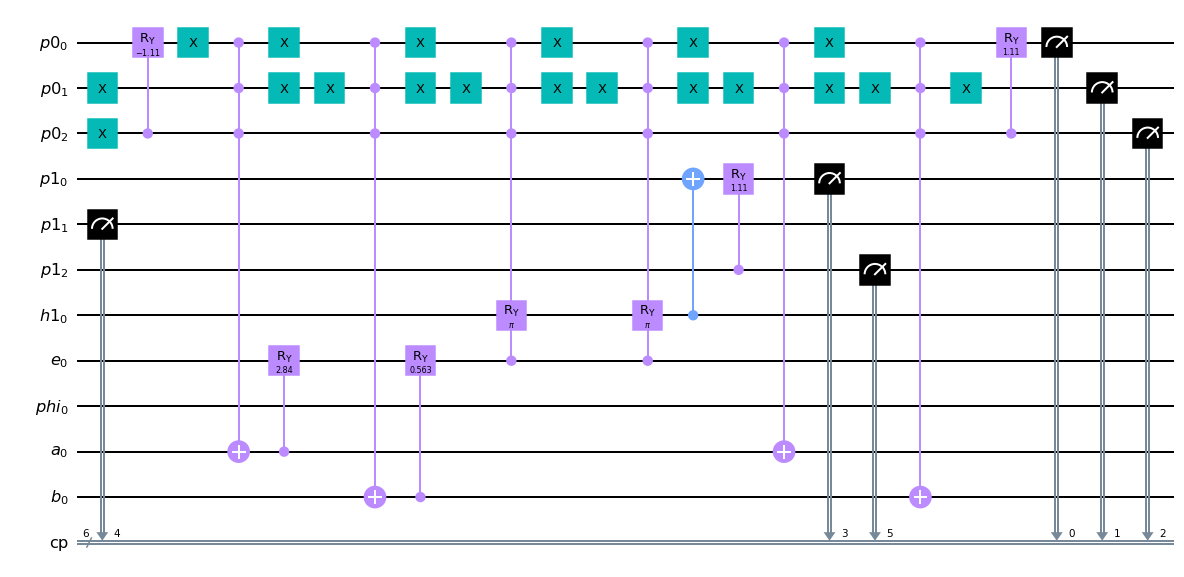

In [5]:
circuit_LBNL1.draw('mpl',fold=100)

# Only Qiskit

In [9]:
transpiled_qcs = icepp.transpiler([circuit_LBNL1],backend,level=3).transpile()

In [10]:
qc = transpiled_qcs[0]
print(qc.depth(), ',', qc.__len__())
print('Gate counts:', qc.count_ops())

654 , 1050
Gate counts: OrderedDict([('cx', 454), ('rz', 344), ('sx', 230), ('x', 15), ('measure', 6), ('barrier', 1)])


In [11]:
simulation_counts = icepp.simulator(qc).aer_simulator(shots=1024)
print(simulation_counts)

{'000100': 139, '001100': 658, '001101': 97, '000101': 130}


In [12]:
all_mitigated_counts = icepp.pass_manager(qc, level=1, backend=backend, shots=1024).auto_manager()

Job id : e3deafaf7e6241f3b1cbcf41864378bb-1639329121221424
Job Status: job has successfully run
Raw counts: {'000000': 75, '000001': 60, '010000': 4, '010010': 3, '010011': 3, '010100': 4, '010110': 2, '010111': 2, '011000': 1, '011001': 1, '011010': 2, '011011': 1, '011100': 1, '011110': 3, '011111': 2, '000010': 79, '100000': 9, '100001': 11, '100010': 10, '100011': 20, '100100': 12, '100101': 12, '100110': 8, '100111': 20, '101000': 11, '101001': 7, '101010': 9, '101011': 13, '101100': 4, '101101': 3, '101110': 7, '101111': 10, '000011': 105, '110000': 1, '110010': 1, '110011': 1, '110101': 1, '110110': 1, '110111': 1, '000100': 72, '000101': 66, '000110': 77, '000111': 73, '001000': 32, '001001': 32, '001010': 22, '001011': 34, '001100': 19, '001101': 23, '001110': 29, '001111': 25}
Measurement error mitigated counts {'000000': 71.93764052096451, '000001': 53.323915327486645, '000010': 95.49507396210555, '000011': 147.81836870071, '000100': 69.55977524143744, '000101': 68.431345850

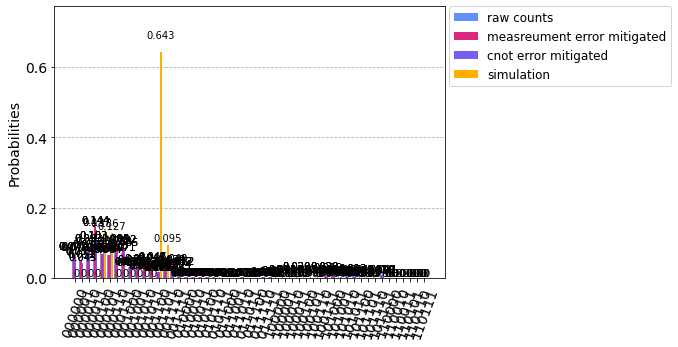

In [13]:
raw_counts, meas_mit_counts, cnot_mit_counts = all_mitigated_counts[0], all_mitigated_counts[1], all_mitigated_counts[2]

legend = ['raw counts','measreument error mitigated','cnot error mitigated','simulation']
plot_histogram([raw_counts, meas_mit_counts, cnot_mit_counts, simulation_counts], legend=legend)

# AQCEL circuit optimization

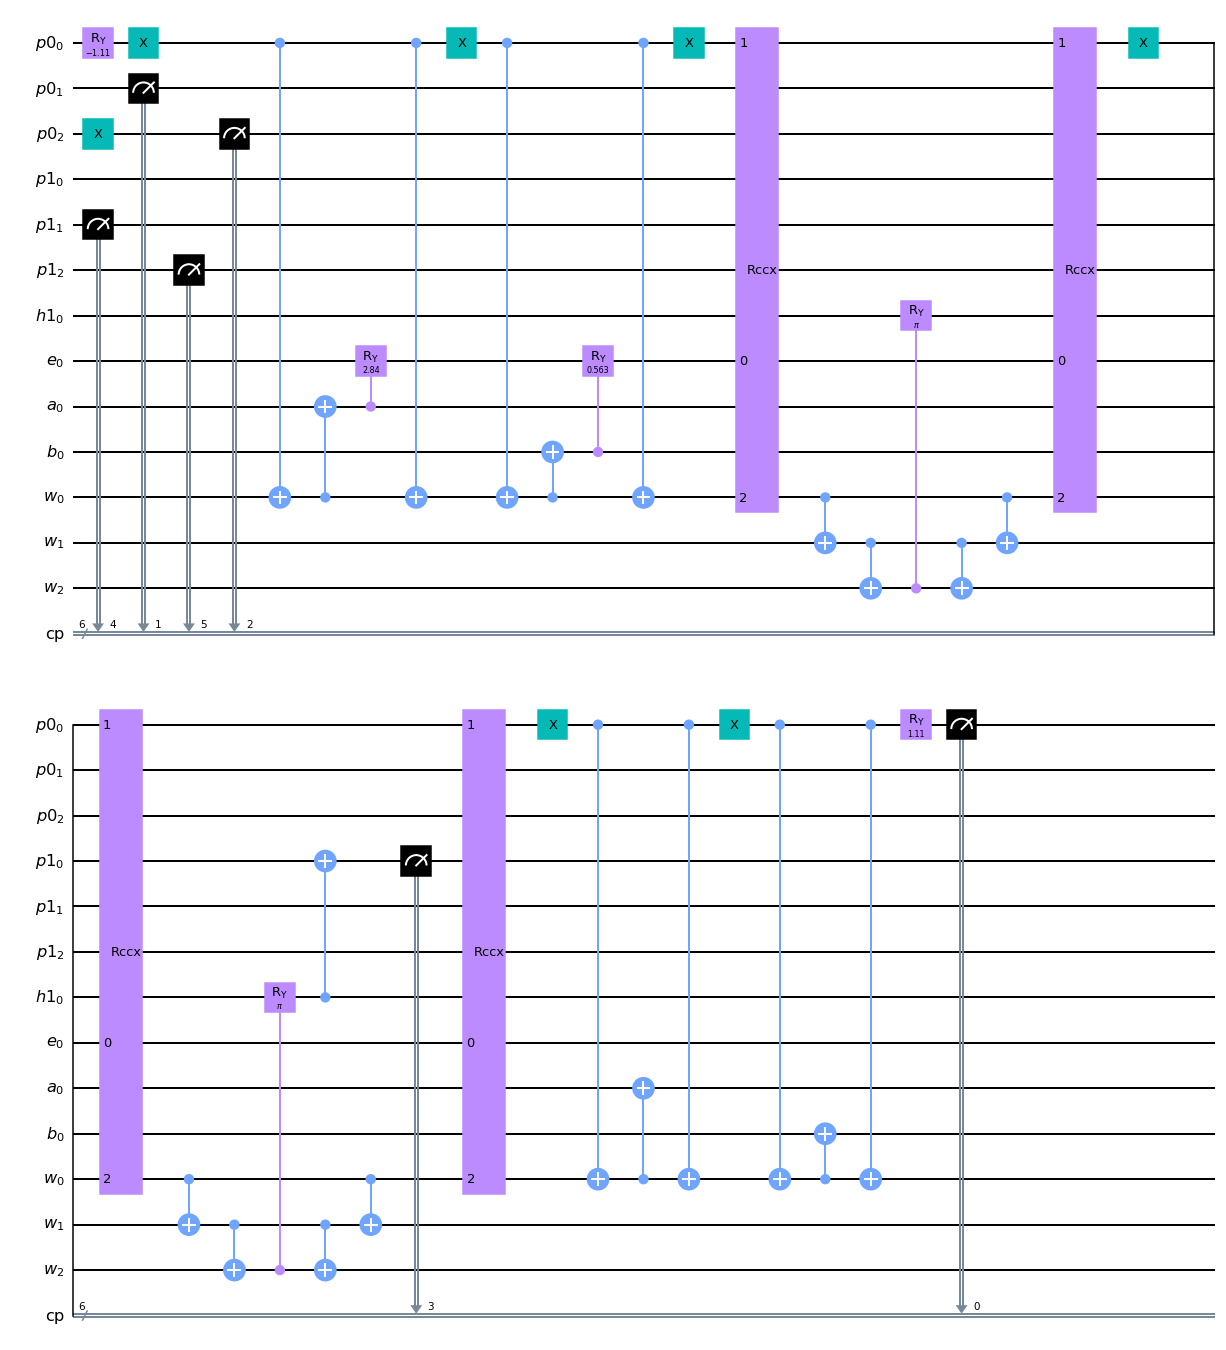

In [16]:
# Just obtain an optimizied circuit
only_qc = icepp.pass_manager(circuit_LBNL1, measure_type='cc').aqcel_apply()
only_qc.draw('mpl')

In [17]:
aqcel_results_cc = icepp.pass_manager(circuit_LBNL1, level=2, backend=backend, shots=1024, measure_type='cc').auto_manager()

Job id : 8c23459d5ccd4b22984ea6b0a7ad49c1-1639330062461416
Job Status: job has successfully run
Raw counts: {'000000': 3, '000001': 16, '010000': 1, '010100': 11, '010101': 15, '011100': 2, '011101': 11, '100000': 1, '100001': 1, '100100': 22, '100101': 34, '100111': 1, '101100': 15, '101101': 31, '101111': 1, '000011': 1, '110100': 1, '111001': 2, '000100': 215, '000101': 246, '000110': 4, '000111': 7, '001000': 7, '001001': 8, '001010': 1, '001100': 158, '001101': 201, '001110': 4, '001111': 4}
Measurement error mitigated counts {'000000': 7.949206563701774e-14, '000001': 9.595356116253576, '000010': 3.1057402753587004e-15, '000011': 0.5210604608361475, '000100': 219.1221509579875, '000101': 255.7463546775298, '000110': 1.0579895409664248, '000111': 6.331206956872534, '001000': 3.13811614331201, '001001': 1.6117743053966813, '001010': 0.5517597218255462, '001011': 2.1526811004511246e-15, '001100': 168.17884382591097, '001101': 208.03592787969586, '001110': 1.7920736000945612, '001111

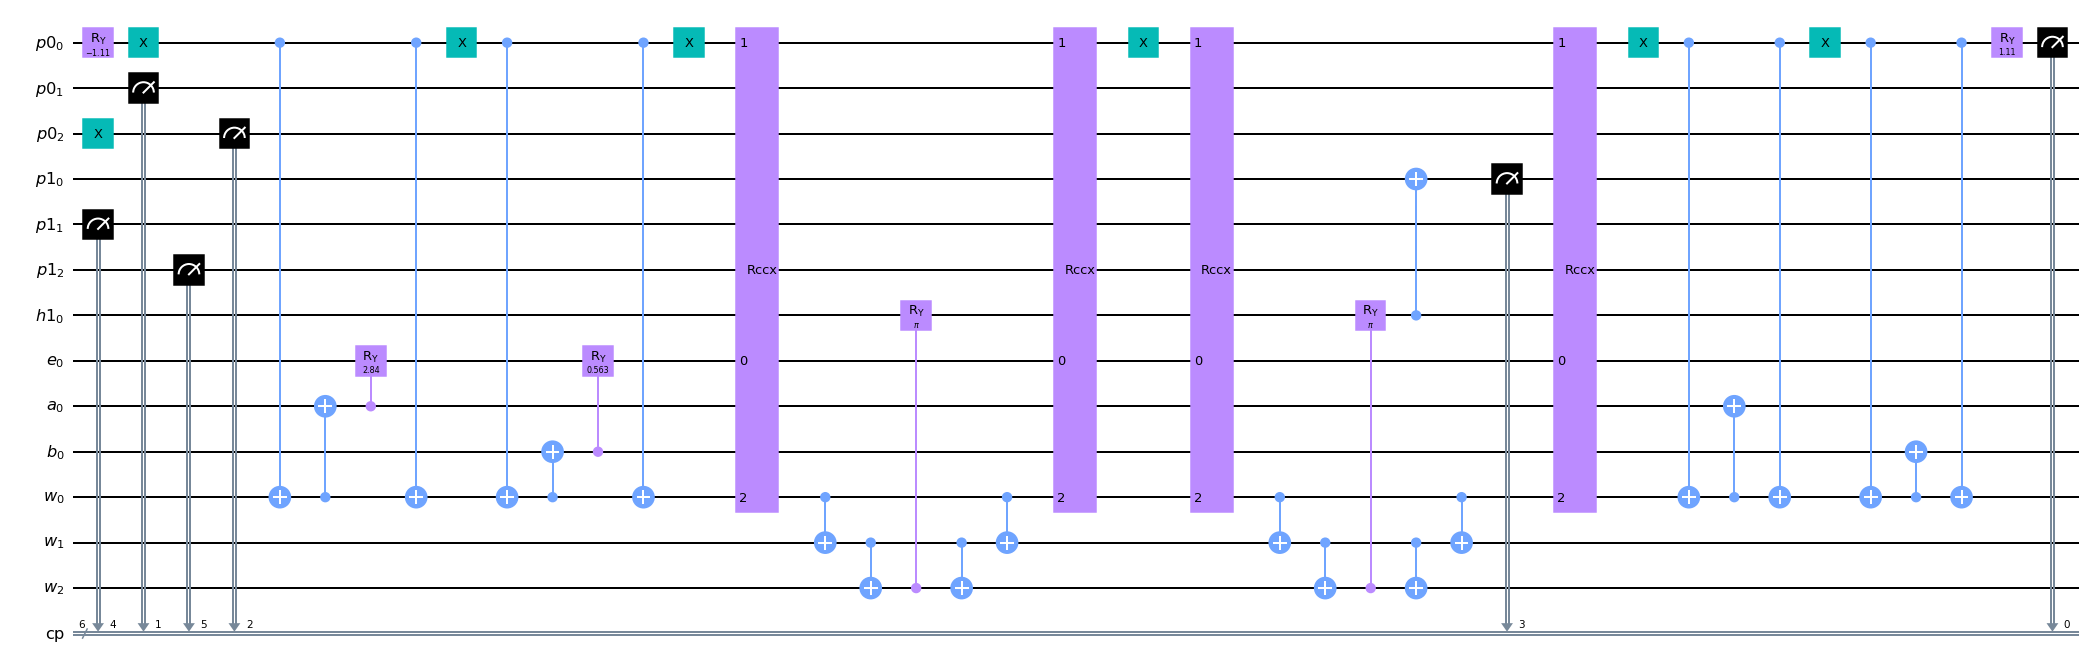

In [18]:
aqcel_results_cc[0].draw('mpl',fold=100)

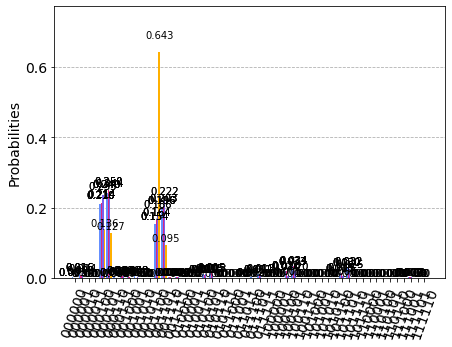

In [20]:
plot_histogram([aqcel_results_cc[2][0], aqcel_results_cc[2][1], aqcel_results_cc[2][2], simulation_counts])

In [6]:
aqcel_results_qc = icepp.pass_manager(circuit_LBNL1, level=2, backend=backend, shots=1024, measure_type='qc', threshold_type=['dynamic',0.15]).auto_manager()

               
 p0_0: ────────
       ┌───┐   
 p0_1: ┤ X ├───
       ├───┤┌─┐
 p0_2: ┤ X ├┤M├
       └───┘└╥┘
 p1_0: ──────╫─
             ║ 
 p1_1: ──────╫─
             ║ 
 p1_2: ──────╫─
             ║ 
 h1_0: ──────╫─
             ║ 
  e_0: ──────╫─
             ║ 
phi_0: ──────╫─
             ║ 
  a_0: ──────╫─
             ║ 
  b_0: ──────╫─
             ║ 
  w_0: ──────╫─
             ║ 
  w_1: ──────╫─
             ║ 
  w_2: ──────╫─
             ║ 
  c: 1/══════╩═
             0 
Job id : bae6456e35a2414e8bddf037765adc69-1639321088934392
Job Status: job has successfully run
Raw counts: {'0': 33, '1': 991}
Measurement error mitigated counts {'1': 1024.0}
Final counts after applying the threshold : {'1': 1024.0}
Threshold : 51.2
       ┌─────────────┐┌───┐┌─┐
 p0_0: ┤ Ry(-1.1071) ├┤ X ├┤M├
       └────┬───┬────┘└┬─┬┘└╥┘
 p0_1: ─────┤ X ├──────┤M├──╫─
            ├───┤      └╥┘  ║ 
 p0_2: ─────┤ X ├───────╫───╫─
            └───┘       ║   ║ 
 p1_0: ─────────────────╫───╫─
    

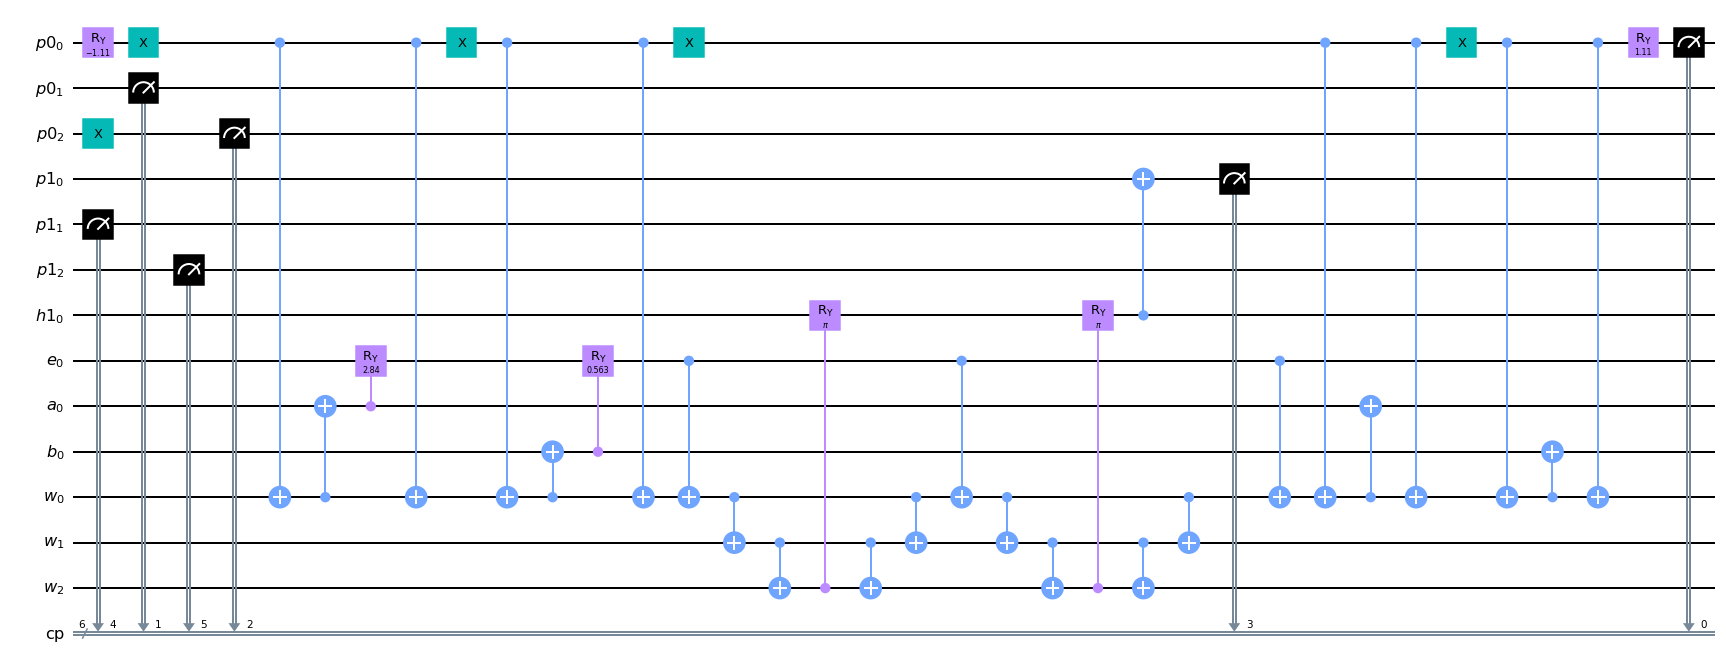

In [7]:
aqcel_results_qc[0].draw('mpl' ,fold=100)

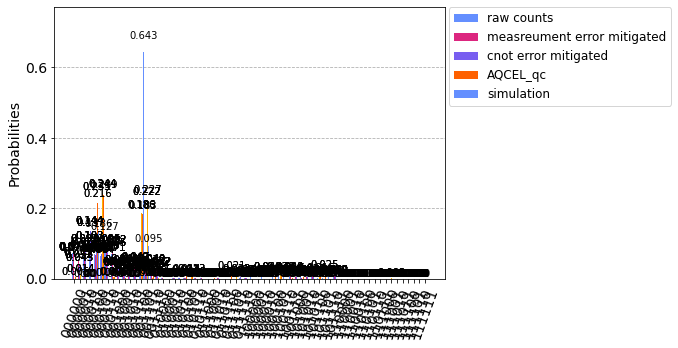

In [22]:
legend = ['raw counts','measreument error mitigated','cnot error mitigated','AQCEL_cc','AQCEL_qc','simulation']
plot_histogram([raw_counts, meas_mit_counts, cnot_mit_counts, aqcel_results_cc[2][-1], aqcel_results_qc[2][-1], simulation_counts], legend=legend)

In [23]:
import math

def fidelity(count1,count2,shots):
    fidelity=0
    for key in count1.keys():
        if (key in count2) and (count1[key] >0) and (count2[key] >0):
            fidelity += math.sqrt((count1[key]*count2[key]))/shots
    return fidelity

def all_fidelities(sim_counts, counts_list, shots):
    fidelity_list = []
    for counts in counts_list:
        each_fidelity = fidelity(sim_counts, counts ,shots)
        fidelity_list.append(each_fidelity)
    return fidelity_list

In [25]:
all_fidelities(sim_counts=simulation_counts, counts_list=all_mitigated_counts+[aqcel_results_cc[2][-1],aqcel_results_qc[2][-1]], shots=1024)

[0.34347078800987213,
 0.3357848676974059,
 0.35714239323157354,
 0.846157331678911,
 0.8391850654336421]